In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
df_data_main = pd.read_csv('useful_data1.csv')
df_data = df_data_main.copy()
df_data = df_data.drop(columns = ['artists' , 'id' , 'name' , 'genres', 'release_date'])
df_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991,0.598,168333,0.22400,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.986,0.208,182227,0.23400,0,0.656000,8,0.2340,-15.427,1,0,0.0426,85.288,0.2090,1920
2,0.994,0.392,165253,0.12800,0,0.153000,2,0.0983,-15.220,1,0,0.0378,126.728,0.2260,1920
3,0.992,0.344,171160,0.19600,0,0.004410,0,0.1570,-13.969,1,0,0.0365,79.837,0.3540,1920
4,0.891,0.410,181969,0.29600,1,0.000005,0,0.0910,-13.879,0,0,0.0386,127.946,0.0625,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136068,0.983,0.775,212198,0.02330,0,0.787000,6,0.0656,-17.366,1,0,0.0430,80.021,0.5680,2021
136069,0.987,0.807,182852,0.03690,0,0.834000,7,0.2200,-13.781,1,0,0.0824,80.076,0.2170,2021
136070,0.845,0.210,148814,0.00405,0,0.924000,1,0.1130,-26.079,1,0,0.0438,76.501,0.0337,2021
136071,0.993,0.649,194585,0.01870,0,0.917000,3,0.0814,-21.098,0,0,0.0621,80.015,0.6620,2021


In [4]:
df_data['decade'] = df_data.year.apply(lambda year : year-(year%10))
df_data = df_data[df_data.decade != 2020]
labels = df_data['decade']
df_data = df_data.drop(columns = ['year' , 'decade'])
df_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.9910,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340
1,0.9860,0.208,182227,0.234,0,0.656000,8,0.2340,-15.427,1,0,0.0426,85.288,0.2090
2,0.9940,0.392,165253,0.128,0,0.153000,2,0.0983,-15.220,1,0,0.0378,126.728,0.2260
3,0.9920,0.344,171160,0.196,0,0.004410,0,0.1570,-13.969,1,0,0.0365,79.837,0.3540
4,0.8910,0.410,181969,0.296,1,0.000005,0,0.0910,-13.879,0,0,0.0386,127.946,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133389,0.7000,0.917,176704,0.540,0,0.000000,0,0.0753,-6.270,0,69,0.0578,112.579,0.9350
133390,0.0972,0.347,449640,0.540,0,0.124000,9,0.1290,-8.684,1,0,0.0306,99.182,0.1650
133391,0.1150,0.545,185733,0.884,0,0.000424,2,0.0496,-5.208,1,72,0.0817,110.015,0.2720
133392,0.0203,0.516,280660,0.812,0,0.000000,9,0.2800,-6.261,1,20,0.4380,86.863,0.4670


In [5]:
df_data = (df_data - df_data.mean()) / (df_data.std())   
df_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,1.299731,0.404671,-0.492740,-0.976170,-0.244335,-0.566778,-0.055059,0.923279,-0.182098,-1.564898,-0.829882,0.107452,1.078773,0.404374
1,1.286482,-1.807075,-0.391671,-0.939333,-0.244335,1.449380,0.801545,0.130105,-0.682006,0.639015,-1.406889,-0.320775,-1.053131,-1.182501
2,1.307681,-0.763584,-0.515145,-1.329799,-0.244335,-0.097777,-0.911663,-0.612196,-0.645035,0.639015,-1.406889,-0.361079,0.312595,-1.119026
3,1.302381,-1.035799,-0.472176,-1.079312,-0.244335,-0.554819,-1.482732,-0.291097,-0.421604,0.639015,-1.406889,-0.371994,-1.232778,-0.641097
4,1.034747,-0.661504,-0.393548,-0.710947,4.092706,-0.568368,-1.482732,-0.652128,-0.405529,-1.564898,-1.406889,-0.354361,0.352737,-1.729506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133389,0.528627,2.213766,-0.431847,0.187862,-0.244335,-0.568384,-1.482732,-0.738009,0.953456,-1.564898,1.910898,-0.193147,-0.153709,1.528254
133390,-1.068699,-1.018786,1.553566,0.187862,-0.244335,-0.186977,1.087080,-0.444262,0.522310,0.639015,-1.406889,-0.421534,-0.595230,-1.346789
133391,-1.021532,0.104101,-0.366168,1.455035,-0.244335,-0.567080,-0.911663,-0.878593,1.143131,0.639015,2.055150,0.007532,-0.238210,-0.947270
133392,-1.272472,-0.060363,0.324358,1.189813,-0.244335,-0.568384,1.087080,0.381733,0.955063,0.639015,-0.445211,2.999240,-1.001224,-0.219175


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.20)

# KNN

Text(0, 0.5, 'Error Rate')

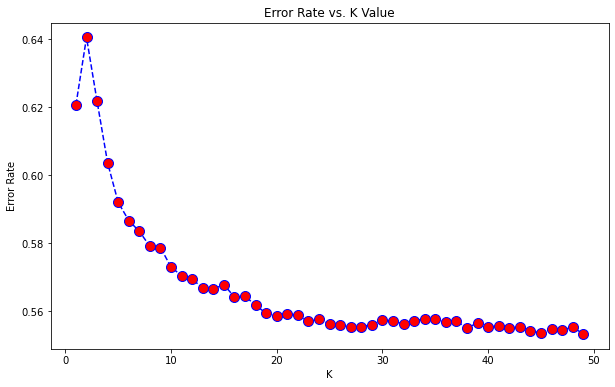

In [159]:
#To determine the k value for KNN
error_rate = []
for k in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [160]:
#KNN classifier
classifier = KNeighborsClassifier(n_neighbors=27)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.44      0.34      0.39       658
        1930       0.43      0.29      0.35      1171
        1940       0.43      0.49      0.45      1969
        1950       0.44      0.48      0.46      3246
        1960       0.41      0.50      0.45      3501
        1970       0.37      0.39      0.38      3531
        1980       0.43      0.39      0.41      3603
        1990       0.40      0.42      0.41      3515
        2000       0.43      0.27      0.33      2333
        2010       0.69      0.66      0.67      3152

    accuracy                           0.44     26679
   macro avg       0.45      0.42      0.43     26679
weighted avg       0.45      0.44      0.44     26679



## NeighborhoodComponents Analysis & KneighborsClassifier

In [ ]:
#This will take quite a bit of time to run
X_train, X_test, y_train, y_test = train_test_split(df_data, labels ,stratify=labels, test_size=0.8 , random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=27)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
y_pred = nca_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
#so far KNN in complement with NCA give the best result

## Naive Bayes Classifier

In [169]:
#Naive Bayes classifier
X_train, X_test, y_train, y_test = train_test_split(df_data, labels , test_size=0.8)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.00      0.00      0.00      2604
        1930       0.11      0.33      0.16      4516
        1940       0.25      0.81      0.38      7662
        1950       0.06      0.01      0.02     12692
        1960       0.22      0.32      0.26     14195
        1970       0.28      0.38      0.32     14466
        1980       0.32      0.18      0.23     14463
        1990       0.39      0.05      0.09     14513
        2000       0.28      0.21      0.24      9224
        2010       0.56      0.42      0.48     12381

    accuracy                           0.26    106716
   macro avg       0.25      0.27      0.22    106716
weighted avg       0.28      0.26      0.24    106716



C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Nearest Centroid

In [163]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.18      0.37      0.24       658
        1930       0.28      0.34      0.31      1171
        1940       0.26      0.41      0.32      1969
        1950       0.31      0.28      0.30      3246
        1960       0.30      0.33      0.31      3501
        1970       0.29      0.21      0.24      3531
        1980       0.33      0.28      0.30      3603
        1990       0.29      0.11      0.16      3515
        2000       0.23      0.42      0.30      2333
        2010       0.45      0.42      0.43      3152

    accuracy                           0.30     26679
   macro avg       0.29      0.32      0.29     26679
weighted avg       0.31      0.30      0.29     26679



## EXPERIMENTS WITH FEATURES ENGINEERING 

In [7]:
df_data = pd.concat([df_data, labels], axis=1)
df_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,decade
0,1.299731,0.404671,-0.492740,-0.976170,-0.244335,-0.566778,-0.055059,0.923279,-0.182098,-1.564898,-0.829882,0.107452,1.078773,0.404374,1920
1,1.286482,-1.807075,-0.391671,-0.939333,-0.244335,1.449380,0.801545,0.130105,-0.682006,0.639015,-1.406889,-0.320775,-1.053131,-1.182501,1920
2,1.307681,-0.763584,-0.515145,-1.329799,-0.244335,-0.097777,-0.911663,-0.612196,-0.645035,0.639015,-1.406889,-0.361079,0.312595,-1.119026,1920
3,1.302381,-1.035799,-0.472176,-1.079312,-0.244335,-0.554819,-1.482732,-0.291097,-0.421604,0.639015,-1.406889,-0.371994,-1.232778,-0.641097,1920
4,1.034747,-0.661504,-0.393548,-0.710947,4.092706,-0.568368,-1.482732,-0.652128,-0.405529,-1.564898,-1.406889,-0.354361,0.352737,-1.729506,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133389,0.528627,2.213766,-0.431847,0.187862,-0.244335,-0.568384,-1.482732,-0.738009,0.953456,-1.564898,1.910898,-0.193147,-0.153709,1.528254,2010
133390,-1.068699,-1.018786,1.553566,0.187862,-0.244335,-0.186977,1.087080,-0.444262,0.522310,0.639015,-1.406889,-0.421534,-0.595230,-1.346789,2010
133391,-1.021532,0.104101,-0.366168,1.455035,-0.244335,-0.567080,-0.911663,-0.878593,1.143131,0.639015,2.055150,0.007532,-0.238210,-0.947270,2010
133392,-1.272472,-0.060363,0.324358,1.189813,-0.244335,-0.568384,1.087080,0.381733,0.955063,0.639015,-0.445211,2.999240,-1.001224,-0.219175,2010


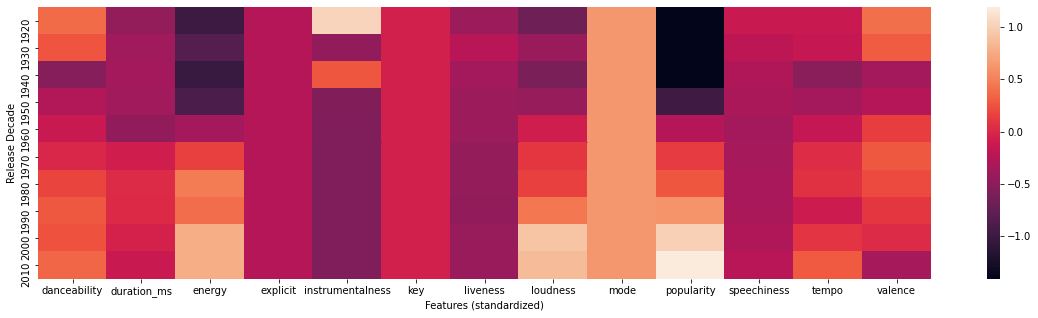

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_data.groupby(['decade']).quantile(0.50).iloc[:,1:])
plt.ylabel("Release Decade")
plt.xlabel("Features (standardized)")
plt.show()
#based on below plot, features such as explicit, key ,mode do not have large variance across the decade. will be dropping them.

In [9]:
def createPercentileFeature(columns, data):
    createCol = []
    for feature in columns:
        _25_percentile = data[feature].quantile(0.25)
        _50_percentile = data[feature].quantile(0.50)
        _75_percentile = data[feature].quantile(0.75)
        
        conditions = [(data[feature] <= _25_percentile), (data[feature] > _25_percentile) & (data[feature] <= _50_percentile) , (data[feature] > _50_percentile) & (data[feature] <= _75_percentile) , (data[feature] > _75_percentile)]  
        values = ['1', '2', '3', '4']
        featureName = 'p_'+ feature
        data[featureName] = np.select(conditions, values)
        createCol.append(featureName)
    return data , createCol

cols = df_data.columns.to_list()
cols.pop(-1)
df_new_data  , createCol = createPercentileFeature(cols , df_data)
df_new_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,p_explicit,p_instrumentalness,p_key,p_liveness,p_loudness,p_mode,p_popularity,p_speechiness,p_tempo,p_valence
0,1.299731,0.404671,-0.492740,-0.976170,-0.244335,-0.566778,-0.055059,0.923279,-0.182098,-1.564898,...,1,3,2,4,2,1,2,4,4,3
1,1.286482,-1.807075,-0.391671,-0.939333,-0.244335,1.449380,0.801545,0.130105,-0.682006,0.639015,...,1,4,3,3,1,2,1,2,1,1
2,1.307681,-0.763584,-0.515145,-1.329799,-0.244335,-0.097777,-0.911663,-0.612196,-0.645035,0.639015,...,1,3,1,2,1,2,1,2,3,1
3,1.302381,-1.035799,-0.472176,-1.079312,-0.244335,-0.554819,-1.482732,-0.291097,-0.421604,0.639015,...,1,3,1,3,2,2,1,2,1,2
4,1.034747,-0.661504,-0.393548,-0.710947,4.092706,-0.568368,-1.482732,-0.652128,-0.405529,-1.564898,...,4,2,1,1,2,1,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133389,0.528627,2.213766,-0.431847,0.187862,-0.244335,-0.568384,-1.482732,-0.738009,0.953456,-1.564898,...,1,1,1,1,4,1,4,3,2,4
133390,-1.068699,-1.018786,1.553566,0.187862,-0.244335,-0.186977,1.087080,-0.444262,0.522310,0.639015,...,1,3,4,2,3,2,1,1,2,1
133391,-1.021532,0.104101,-0.366168,1.455035,-0.244335,-0.567080,-0.911663,-0.878593,1.143131,0.639015,...,1,2,1,1,4,2,4,4,2,1
133392,-1.272472,-0.060363,0.324358,1.189813,-0.244335,-0.568384,1.087080,0.381733,0.955063,0.639015,...,1,1,4,4,4,2,2,4,1,2


In [10]:
cols.append('decade')
cols.append('p_key')
cols.append('p_mode')
cols.append('p_explicit')
df_new_data = df_new_data.drop(columns = cols)

In [16]:
df_new_data

,p_acousticness,p_danceability,p_duration_ms,p_energy,p_instrumentalness,p_liveness,p_loudness,p_popularity,p_speechiness,p_tempo,p_valence
0,4,3,1,1,3,4,2,2,4,4,3
1,4,1,2,1,4,3,1,1,2,1,1
2,4,1,1,1,3,2,1,1,2,3,1
3,4,1,2,1,3,3,2,1,2,1,2
4,4,2,2,2,2,1,2,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...
133389,3,4,2,3,1,1,4,4,3,2,4
133390,2,1,4,3,3,2,3,1,1,2,1
133391,2,3,2,4,2,1,4,4,4,2,1
133392,1,2,4,4,1,4,4,2,4,1,2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_new_data, labels, test_size=0.20)

In [15]:
classifier = KNeighborsClassifier(n_neighbors=27)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.42      0.34      0.38       636
        1930       0.41      0.29      0.34      1127
        1940       0.42      0.53      0.47      1926
        1950       0.42      0.43      0.42      3110
        1960       0.42      0.53      0.47      3478
        1970       0.37      0.35      0.36      3729
        1980       0.40      0.37      0.38      3585
        1990       0.39      0.40      0.39      3646
        2000       0.40      0.29      0.34      2374
        2010       0.60      0.60      0.60      3068

    accuracy                           0.43     26679
   macro avg       0.43      0.41      0.42     26679
weighted avg       0.42      0.43      0.42     26679

